# Cross-Validation 

## Objectives
* Split data into training and testing sets, and explain why validation is necessary.
* Use K-Fold Cross Validation to generate more accurate benchmarks for model accuracy.

## Using Holdout Validation to Check Model Performance

As we discussed previously, models can sometimes **_overfit_** the dataset used for training.  This is analagous to memorizing the answers to the questions on a practice test when studying for a real test.  Although our practice score keeps getting higher and higher with each new round of practice, this doesn't necessarily mean we'll actually do well on the real test.  What if the test places more emphasis on things that the practice test only barely covered? What if what we learned on the practice test doesn't **_generalize_** well to the real-world test?

If the only data we have to evaluate model performance is the data used in training, we'll never actually be able to tell if the model actually knows what we need it to know or if high scores are just due to overfitting the training data.  That's why we split off a portion of our training data and use it as a **_testing set_**.  This way, we have a portion of labeled data that the model has never seen before to make predictions on, so that we can evaluate the model performance on unseen data. 


<center><img src='train-test-split-graphic.png'></center>

### Using sklearn to Create a Testing Set

For this lab, we're going to create 3 different models.  The first will use all the training data, while the second will use a testing set to check for overfitting.  The third will use K-Fold Cross Validation to double check that the performance number we get on our testing set isn't artificially high or low due to randomness.  

For this lab, we'll be using a **_Decision Tree Classifier_** to classify flowers in the **_Iris data set_**.  Let's start by importing the dataset and taking a look at what we're working with. 

In [1]:
# Run this cell to import everything we'll be using for this lab
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# Run this cell to load the Iris Dataset into a dataframe so that we can see what we're working with
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
for ind, val in enumerate(iris.target_names): 
    print("Flower Name: {}   Encoded as: {}".format(val, ind))
iris_df

Flower Name: setosa   Encoded as: 0
Flower Name: versicolor   Encoded as: 1
Flower Name: virginica   Encoded as: 2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Looks like we have 150 rows with 4 data points each--_sepal length, sepal width, petal length,_ and _petal width_.

Let's start by building a classifier.  We'll split the data into training and testing sets just once, and then use the classifier's `.score()` method to see the accuracy score the model achieves on the the testing set.  

For simplicity's sake, our model will treat this as a binary classification problem--rather than trying to predict each of the classes, our model is only going to try and tell if a flower is an _Iris Versicolor_ or not. 

In [6]:
clf1 = DecisionTreeClassifier()
X_Train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
clf1.fit(X_Train, y_train)
print("Accuracy score for classifier: {}".format(clf1.score(X_test, y_test)))

Accuracy score for classifier: 0.9210526315789473


97% accuracy--pretty impressive! However, try running that cell again, and you'll notice that the score changes, dropping down to 92%.  Which is it?  

We're seeing big swings in the testing accuracy because every time we run that cell, we randomly separate data into the training and testing sets.  It's safe to assume that some of examples in the dataset are harder to classify than others.  Sometimes, `train_test_split()` randomly assigns the more of the harder questions to the testing set, sometime more to the training set--we don't know what the makeup of the sets will be, because the division is random. 

Let's run that code 10 times in a row, and see how the variance changes.  

Accuracy score for attempt 1: 1.0
Accuracy score for attempt 2: 0.9473684210526315
Accuracy score for attempt 3: 0.9210526315789473
Accuracy score for attempt 4: 0.9736842105263158
Accuracy score for attempt 5: 0.8947368421052632
Accuracy score for attempt 6: 0.9736842105263158
Accuracy score for attempt 7: 1.0
Accuracy score for attempt 8: 1.0
Accuracy score for attempt 9: 0.9473684210526315
Accuracy score for attempt 10: 0.9736842105263158


Text(0.5,1,'Testing Accuracy Across 10 Separate Iterations')

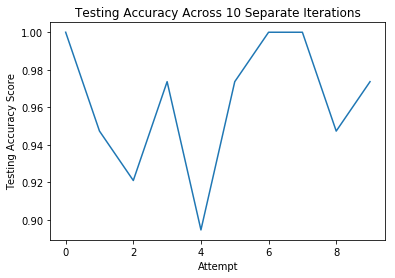

In [4]:
accuracy_scores = []
for i in range(1, 11):
    X_Train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
    clf1 = DecisionTreeClassifier()
    clf1.fit(X_Train, y_train)
    acc = clf1.score(X_test, y_test)
    accuracy_scores.append(acc)
    print("Accuracy score for attempt {}: {}".format(i, acc))

plt.plot(accuracy_scores)
plt.xlabel("Attempt")
plt.ylabel("Testing Accuracy Score")
plt.title("Testing Accuracy Across 10 Separate Iterations")

Those scores are all over the place! By running the model 10 separate times, we get accuracy scores within an 11% range.  Remember, we have no mathematical basis to say that any one of those model scores in the set above are more or less valid than any of the others.  So, does that mean our model is 89% accurate at classifying flowers, or is it 100% accurate, or somewhere in between?

In order to deal with the issues that random sampling can introduce into interpreting the quality of our models, we'll use a more advanced technique called **_K-Fold Cross Validation_**.  

### K-Fold Cross Validation

K-Fold Cross Validation expands on the idea of training and testing splits by splitting the entire dataset into {K} equal sections of data.  We'll then iteratively train {K} classifiers on the data, with each classifier using a different section of data as the testing set, and all other sections combined as the training set.  

We can then average the individual results frome each of these classifiers to get a **_Cross-Validation Accuracy Score_**.  This will be closer to the model's actual accuracy, since "noisy" results that are higher than average will cancel out the "noisy" results that are lower than average.

<img src='cross-val-graphic.png'>

In the cell below, we'll compute the cross validation accuracy with K=3, 5, and 10 (3 folds, 5 folds and 10 folds, respectively).  

Run the cell below to see compute the cross validation scores for each value of K!

In [7]:
clf2 = DecisionTreeClassifier()
cv_3_results = np.mean(cross_val_score(clf2, iris.data, iris.target, cv=3))
cv_5_results = np.mean(cross_val_score(clf2, iris.data, iris.target, cv=5))
cv_10_results = np.mean(cross_val_score(clf2, iris.data, iris.target, cv=10))

print("average model performance with 3-Fold Cross Validation: {}".format(cv_3_results))
print("average model performance with 5-Fold Cross Validation: {}".format(cv_5_results))
print('average model performance with 10-fold Cross Validation: {}'.format(cv_10_results))

average model performance with 3-Fold Cross Validation: 0.9673202614379085
average model performance with 5-Fold Cross Validation: 0.9600000000000002
average model performance with 10-fold Cross Validation: 0.96


As we can see, as K increases, the accuracy seems to converge at around 96%.  With a smaller value of `K=3`, some noise still gets through.  As K increases, we get closer and closer to the actual value, as the number of model scores that goes into the overall average increases, reducing the overall noise.  

# Summary

In this lab, we learned about:
* Validating our model's performance by splitting our data into training and testing sets.
* Using K-Fold Cross Validation to generate more accurate measures of model performance.  